**Tarea 2 Módulo 1 - Análisis de Datos**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
import random
np.random.seed(123)

In [7]:
from google.colab import files 
uploaded=files.upload()

Saving OnlineNewsPopularity.csv to OnlineNewsPopularity.csv


1. Descarge y carge los datos en su notebook, usando Pandas preferiblemente. Imprima para tener una idea de los datos

Data: Online News Popularity

In [8]:
data= pd.read_csv("OnlineNewsPopularity.csv",delimiter =",", header=0)

In [6]:
data.dtypes

url                               object
 timedelta                       float64
 n_tokens_title                  float64
 n_tokens_content                float64
 n_unique_tokens                 float64
                                  ...   
 title_subjectivity              float64
 title_sentiment_polarity        float64
 abs_title_subjectivity          float64
 abs_title_sentiment_polarity    float64
 shares                            int64
Length: 61, dtype: object

In [9]:
data=data.select_dtypes(include=["int64","float64"])

In [10]:
data

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [27]:
print("Tengo N =",len(data), "instancias")

Tengo N = 39644 instancias


In [28]:
print("Tengo N =",len(data.columns), "atributos")

Tengo N = 60 atributos


2. Calcule la cantidad de datos faltantes y luego si no tiene cree artificialmente y aleatoriamente datos faltantes.

In [29]:
perdido=data[data.isna().any(axis=1)] # Ninguno

In [30]:
print("Tengo N=", len(perdido), "datos perdidos")

Tengo N= 21565 datos perdidos


In [31]:
length = len(data)
for i in data.columns[:-3]:
    num = int(np.random.randint(0,4)/100*length)
    idx_replace = np.random.randint(0, length-1, num)
    data.loc[idx_replace, i] = np.nan

## Imputando data missing

In [32]:
data[data.isna().any(axis=1)]

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,NaN,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.80,NaN,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.00,-0.220192,-0.500,NaN,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39638,8.0,11.0,223.0,0.653153,1.0,0.825758,5.0,3.0,1.0,0.0,...,0.214286,0.80,-0.250000,-0.250,-0.250000,0.000000,0.000000,0.500000,0.000000,1200
39639,NaN,11.0,346.0,0.529052,NaN,0.684783,9.0,7.0,1.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900


In [33]:
data.isnull().sum()

 timedelta                        1930
 n_tokens_title                    787
 n_tokens_content                  782
 n_unique_tokens                  1170
 n_non_stop_words                 1560
 n_non_stop_unique_tokens         1559
 num_hrefs                         786
 num_self_hrefs                    784
 num_imgs                         2295
 num_videos                        393
 average_token_length             1930
 num_keywords                     1179
 data_channel_is_lifestyle        1164
 data_channel_is_entertainment     783
 data_channel_is_bus              1926
 data_channel_is_socmed            783
 data_channel_is_tech             1176
 data_channel_is_world            2322
 kw_min_min                       2313
 kw_max_min                       1930
 kw_avg_min                       1936
 kw_min_max                       1561
 kw_max_max                        781
 kw_avg_max                       1173
 kw_min_avg                        394
 kw_max_avg              

Teniendo en cuenta de que no se encontraron datos faltantes en la base de datos, se procedieron a agregar de forma aleoria en cada variable. se seleccionó la varible: n_non_stop_words, por ser una de las variables donde más datos faltantes aleatorios se registraron.

In [34]:
data2=data.copy()
data3=data.copy()

In [35]:
def impute_nan_meanmedian(df, variable, value):
    if value=="median":
        val=df[variable].median()
    if value=="mean":
        val=df[variable].mean()
    df[variable+"_"+value]=df[variable].fillna(val)
    return df
import random
def rand_float_range(start, end):
    return random.random() * (end - start) + start

def impute_nan_random(df, variable, value=-9):
    if value!=-9:
        df[variable+"_random_fixed"]=df[variable].fillna(value)
    else:
        start,end=df[variable].min(),df[variable].max()
        df[variable+"_random"]=df[variable].fillna(rand_float_range(start,end))
    return df

In [36]:
data2.columns

Index([' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_p

Resumen de las medidas de tendencia

In [37]:
data2[" n_non_stop_words"].describe() #maximos y minimos por variable

count    38084.000000
mean         0.997716
std          5.337170
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       1042.000000
Name:  n_non_stop_words, dtype: float64

De acuerdo al resumen de la tabla anterior, encontramos que el valor medio de la variable es igual a 0.997, y que los valores que puede tomar van desde 0 hasta 1042. 

3. Use las metodologías vistas en clase para rellenar, o poner, datos en los lugares de los datos faltantes.



*   Media Importada



In [38]:
impute_nan_meanmedian(data2," n_non_stop_words","mean")

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,n_non_stop_words_mean
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.70,-0.350000,-0.600,-0.200000,0.500000,NaN,0.000000,0.187500,593,1.000000
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,1.000000
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,1.000000
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.80,NaN,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,1.000000
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,1.00,-0.220192,-0.500,NaN,0.454545,0.136364,0.045455,0.136364,505,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,NaN,11.0,346.0,0.529052,NaN,0.684783,9.0,7.0,1.0,1.0,...,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800,0.997716
39640,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,...,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900,1.000000
39641,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,...,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900,1.000000
39642,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,...,0.50,-0.205246,-0.500,NaN,NaN,0.000000,0.500000,0.000000,1100,1.000000




*   Mediana Importada



In [39]:
impute_nan_meanmedian(data2," n_non_stop_words","median")

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,n_non_stop_words_mean,n_non_stop_words_median
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,-0.350000,-0.600,-0.200000,0.500000,NaN,0.000000,0.187500,593,1.000000,1.0
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,1.000000,1.0
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,1.000000,1.0
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,NaN,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,1.000000,1.0
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,-0.220192,-0.500,NaN,0.454545,0.136364,0.045455,0.136364,505,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,NaN,11.0,346.0,0.529052,NaN,0.684783,9.0,7.0,1.0,1.0,...,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800,0.997716,1.0
39640,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,...,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900,1.000000,1.0
39641,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,...,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900,1.000000,1.0
39642,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,...,-0.205246,-0.500,NaN,NaN,0.000000,0.500000,0.000000,1100,1.000000,1.0




*   Aleatoria Arreglada (0.5)



In [40]:
impute_nan_random(data2," n_non_stop_words",0.5)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,n_non_stop_words_mean,n_non_stop_words_median,n_non_stop_words_random_fixed
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,-0.600,-0.200000,0.500000,NaN,0.000000,0.187500,593,1.000000,1.0,1.0
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,1.000000,1.0,1.0
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,1.000000,1.0,1.0
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,1.000000,1.0,1.0
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,-0.500,NaN,0.454545,0.136364,0.045455,0.136364,505,1.000000,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,NaN,11.0,346.0,0.529052,NaN,0.684783,9.0,7.0,1.0,1.0,...,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800,0.997716,1.0,0.5
39640,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,...,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900,1.000000,1.0,1.0
39641,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,...,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900,1.000000,1.0,1.0
39642,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,...,-0.500,NaN,NaN,0.000000,0.500000,0.000000,1100,1.000000,1.0,1.0




*   Aleatoria



In [41]:
impute_nan_random(data2," n_non_stop_words",-9)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,n_non_stop_words_mean,n_non_stop_words_median,n_non_stop_words_random_fixed,n_non_stop_words_random
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,-0.200000,0.500000,NaN,0.000000,0.187500,593,1.000000,1.0,1.0,1.000000
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,-0.100000,0.000000,0.000000,0.500000,0.000000,711,1.000000,1.0,1.0,1.000000
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,1.000000,1.0,1.0,1.000000
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,1.000000,1.0,1.0,1.000000
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,NaN,0.454545,0.136364,0.045455,0.136364,505,1.000000,1.0,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,NaN,11.0,346.0,0.529052,NaN,0.684783,9.0,7.0,1.0,1.0,...,-0.125000,0.100000,0.000000,0.400000,0.000000,1800,0.997716,1.0,0.5,659.103043
39640,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,...,-0.100000,0.300000,1.000000,0.200000,1.000000,1900,1.000000,1.0,1.0,1.000000
39641,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,...,-0.166667,0.454545,0.136364,0.045455,0.136364,1900,1.000000,1.0,1.0,1.000000
39642,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,...,NaN,NaN,0.000000,0.500000,0.000000,1100,1.000000,1.0,1.0,1.000000




*   KNN



In [42]:
from sklearn.impute import KNNImputer
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
# fit on the dataset
imputer.fit(data3)
# transform the dataset
Xtrans = imputer.transform(data3)

In [43]:
Xtrans=pd.DataFrame(Xtrans,columns=data3.columns)

In [44]:
Xtrans

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,0.067500,0.000000,0.187500,593.0
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711.0
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500.0
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.80,-0.197595,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200.0
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,228.6,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800.0
39640,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900.0
39641,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900.0
39642,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,...,0.062500,0.50,-0.205246,-0.500,-0.090000,0.230000,0.000000,0.500000,0.000000,1100.0


4. Haga gráficos para evaluar la calidad de este llenado y las formas de las distribuciones.

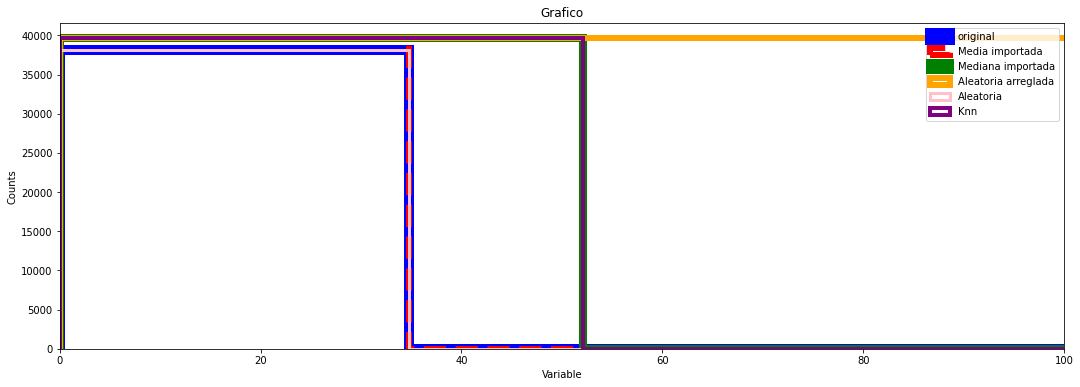

In [45]:
plt.figure(figsize=(18,6))
plt.hist(data[" n_non_stop_words"],label="original",color="blue", histtype="step", bins=30, lw= 10)
plt.hist(data2[" n_non_stop_words_mean"],label="Media importada",color="red",histtype="step", bins=30, lw=6, linestyle="--")
plt.hist(data2[" n_non_stop_words_median"],label="Mediana importada",color="green",histtype="step", bins=20, lw=8)
plt.hist(data2[" n_non_stop_words_random_fixed"],label="Aleatoria arreglada",color="orange",histtype="step", bins=10, lw=6)
plt.hist(data2[" n_non_stop_words_random"],label="Aleatoria",color="pink",histtype="step", bins=30, lw=3)
plt.hist(Xtrans[" n_non_stop_words"],label="Knn",color="purple", histtype="step", bins=20, lw=4)
plt.xlim(0,100)
plt.xlabel("Variable")
plt.ylabel("Counts")
plt.title("Grafico")
plt.legend()
plt.show()


5. Escriba conclusiones acerca del proceso, ¿qué metodología de imputaciíon le sirvió mejor?


Posterior al proceso de ajuste de la información faltante, para la variable **n_non_stop_words** se encontró que la metodologia que más se ajusta a la distribución real es la generada a tarves de un dato aleatorio, lo que se evidencia en la imagen anterior al revisar las lineas azul(original) y la linea rosada (aleatoria).  


Adicionalmente use los algoritmos que encontrará en el segundo notebook para inferir regresiones, determine parámetros, determine el grado de regresión o coeficiente de regresión (bondad de ajuste) y escriba conclusiones.

## Lineal regression, multiple linear regression, another regressions!

In [46]:
import seaborn as sns

In [47]:
data

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,NaN,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.80,NaN,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.00,-0.220192,-0.500,NaN,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,NaN,11.0,346.0,0.529052,NaN,0.684783,9.0,7.0,1.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,...,0.062500,0.50,-0.205246,-0.500,NaN,NaN,0.000000,0.500000,0.000000,1100



*   Triangle Correlation Heatmap



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


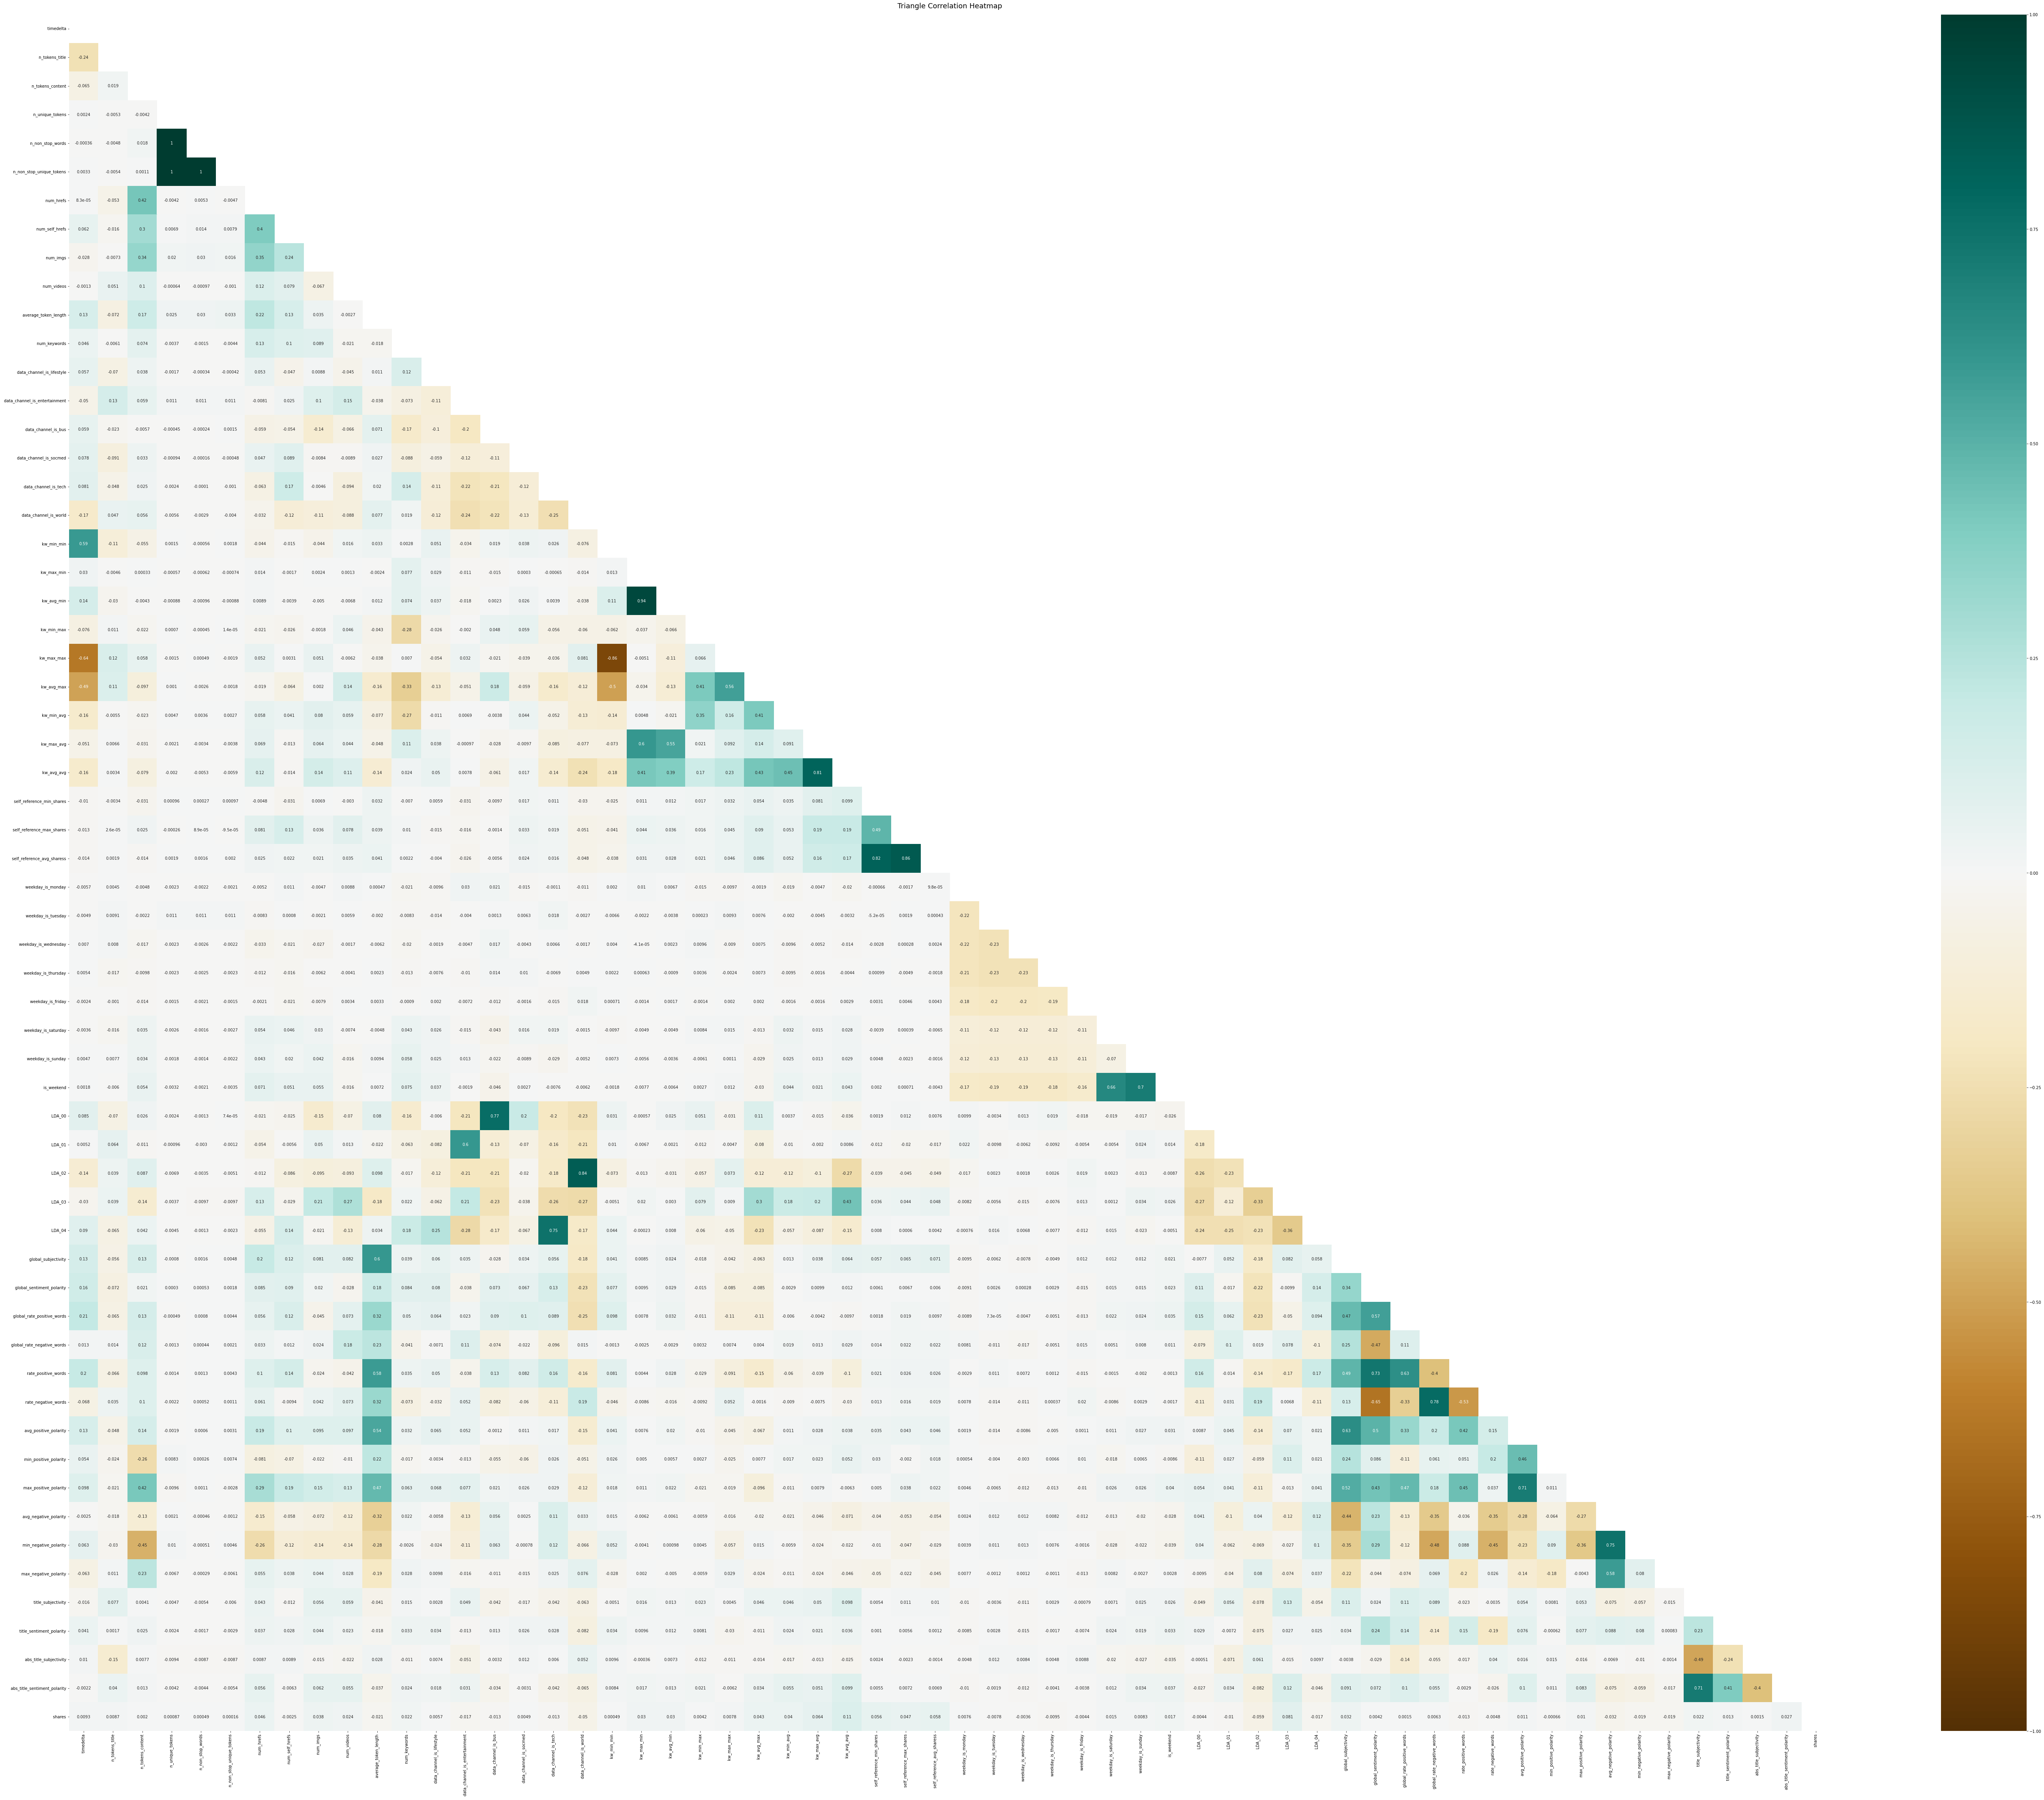

In [48]:
plt.figure(figsize=(100,80))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
plt.show()

Al observar el mapa de correlacion, se encontró que las variables kw_avg_min y kw_max_min tienen una correlacion muy alta igual al 0.94, por lo que la variable dependiente será: kw_avg_min, mientras la variable independiente será :kw_max_min. 

In [49]:
from scipy import optimize
import random

In [50]:
def f( x, p0, p1):
    return p0+p1*x

def ff(x, p):
    return f(x, *p)



*   Using Optimize.leastsq



In [51]:
def fit_leastsq(p0, datax, datay, function):

    errfunc = lambda p, x, y: function(x,p) - y

    pfit, pcov, infodict, errmsg, success = optimize.leastsq(errfunc, p0, args=(datax, datay), full_output=1, epsfcn=0.0001)

    if (len(datay) > len(p0)) and pcov is not None:
        s_sq = (errfunc(pfit, datax, datay)**2).sum()/(len(datay)-len(p0))
        pcov = pcov * s_sq
    else:
        pcov = np.inf

    error = [] 
    for i in range(len(pfit)):
        try:
            error.append(np.absolute(pcov[i][i])**0.5)
        except:
            error.append( 0.00 )
    pfit_leastsq = pfit
    perr_leastsq = np.array(error) 
    return pfit_leastsq, perr_leastsq 

# These are the true parameters
p0,p1 = 1.0, 1.0
# These are initial guesses for fits:
pstart = [p0+random.random(),p1+random.random()]
pfit, perr = fit_leastsq(pstart, Xtrans[" kw_avg_min"], Xtrans[" kw_max_min"], ff)

print("\n# Fit parameters and parameter errors from lestsq method :")
print("pfit = ", pfit)
print("perr = ", perr)


# Fit parameters and parameter errors from lestsq method :
pfit =  [-676.92980576    5.89225652]
perr =  [8.04864556 0.01194774]


Conforme a los resultados obtenidos, usando el metodo least square se encontró que el valor del intercepto es igual a -676.93 mientras que el valor del parametro de la varible independiente es igual a 5.89, el coeficiente de variación es igual a -1.09% lo cual es encuentra dentro de los valores de referencia tolerantes (-20% - 20%).



*   Using bootstrap



In [52]:
def fit_bootstrap(p0, datax, datay, function, yerr_systematic=0.0):

    errfunc = lambda p, x, y: function(x,p) - y

    # Fit first time
    pfit, perr = optimize.leastsq(errfunc, p0, args=(datax, datay), full_output=0)


    # Get the stdev of the residuals
    residuals = errfunc(pfit, datax, datay)
    sigma_res = np.std(residuals)

    sigma_err_total = np.sqrt(sigma_res**2 + yerr_systematic**2)

    # 100 random data sets are generated and fitted
    ps = []
    for i in range(100):

        randomDelta = np.random.normal(0., sigma_err_total, len(datay))
        randomdataY = datay + randomDelta
        randomfit, randomcov = optimize.leastsq(errfunc, p0, args=(datax, randomdataY), full_output=0)
        ps.append(randomfit) 

    ps = np.array(ps)
    mean_pfit = np.mean(ps,0)

    # You can choose the confidence interval that you want for your
    # parameter estimates: 
    Nsigma = 1. # 1sigma gets approximately the same as methods above
                # 1sigma corresponds to 68.3% confidence interval
                # 2sigma corresponds to 95.44% confidence interval
    err_pfit = Nsigma * np.std(ps,0) 

    pfit_bootstrap = mean_pfit
    perr_bootstrap = err_pfit
    return pfit_bootstrap, perr_bootstrap 

pfit, perr = fit_bootstrap(pstart, Xtrans[" kw_avg_min"], Xtrans[" kw_max_min"], ff)

print("\n# Fit parameters and parameter errors from bootstrap method :")
print("pfit = ", pfit)
print("perr = ", perr)


# Fit parameters and parameter errors from bootstrap method :
pfit =  [-677.49163501    5.89383669]
perr =  [7.86476752 0.01163838]


Now let's some plot to get the evaluation

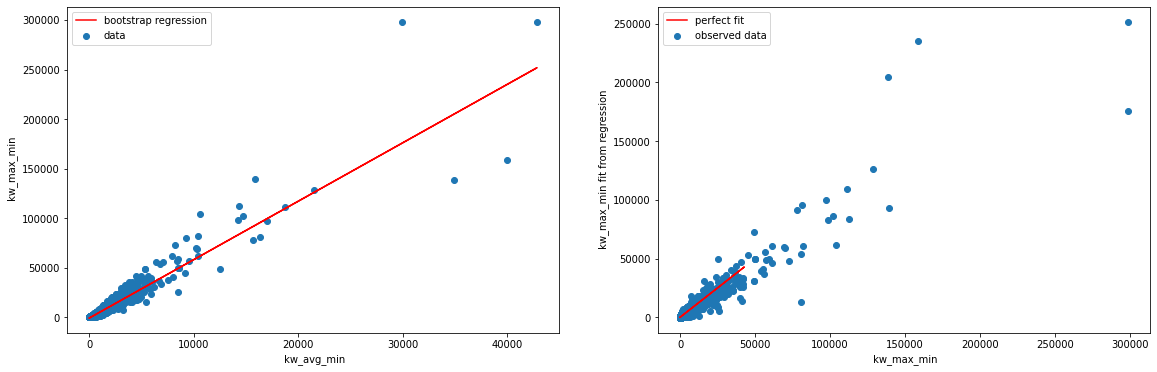

In [58]:
plt.figure(figsize=(30,6))
plt.subplot(131)
plt.scatter(data[" kw_avg_min"],data[" kw_max_min"],label="data")
x0=Xtrans[" kw_avg_min"]
plt.plot(x0,f(x0,*pfit),color="r",label="bootstrap regression")
plt.xlabel(" kw_avg_min")
plt.ylabel(" kw_max_min")
plt.legend()

plt.subplot(132)
plt.scatter(data[" kw_max_min"],f(x0,*pfit),label="observed data")
plt.plot(x0,x0,color="r",label="perfect fit")
plt.xlabel(" kw_max_min")
plt.ylabel(" kw_max_min fit from regression")
plt.legend()
plt.show()

R cuadrado: Coeficiente de determinación

In [59]:
from sklearn.metrics import r2_score

In [60]:
r2 = r2_score(Xtrans[" kw_max_min"], f(x0,*pfit))
print("r2 score for perfect model is", r2)

r2 score for perfect model is 0.8598518370438227


In [57]:
f(x0,*pfit)#Xtrans[" kw_max_min"]

0       -677.491635
1       -677.491635
2               NaN
3       -677.491635
4       -677.491635
            ...    
39639    342.878842
39640    406.974316
39641    314.146388
39642   -683.385472
39643   -538.986473
Name:  kw_avg_min, Length: 39644, dtype: float64

Este conjunto de datos denominado: Online news populary, resume un conjunto heterogéneo de características sobre los artículos publicados por el blog de noticias Mashable en un período de dos años. El objetivo es predecir el número de acciones en las redes sociales (popularidad). Para esto, integra un total de 60 variables, entre ellas: la Url del articulo, dias entre publicacion, número de palabras en el titulo y en el contenido, número de imagenes, y 39.797 instancias. 

Inicialmente se identificó que la base de datos no presenta datos faltantes, por lo que a traves del porceso de imputacion de datos, se agregaron datos faltantes. Asimismo para el proceso de corrección se seleccionó la variable **n_non_stop_words** que muestra la Tasa de palabras continuas en el contenido, por ser una de las que mas datos faltantes aleatorios presentó. 

Como metodo de ajuste a la información faltante se seleccionó, agregar datos de forma aleatoria comprendidos entre los rangos de la variable, ya que este metodo fue el que más se ajusto a la data original. 

Con respecto al proceso de regresion, el triangulo de correlación mostró una asociación del 0.94 entre las variables: **kw_avg_min** (Peor palabra clave (promedio de acciones)) y **kw_max_min** (Mejor palabra clave (máx. compartidos)), por lo que se tomó kw_avg_min, como la variable dependiente, mientras que kw_max_min será la variable independiente. 


Finalmente, se observa que con los dos metodos, los resultados de los parametros estimados son muy similares, sin embargo, con el metodo: **bootstrap**, los resultados del error son un poco menores. Finalmente el R2 del modelo es igual a 0.859. lo cual suguiere un buen ajuste del modelo. 
